### Lab : Cats and Dogs
During this lab, we are going to classify images of cats and dogs !

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Data loading**

In [2]:
# Download zip file
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-07-11 12:19:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 2404:6800:4003:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   180MB/s    in 0.4s    

2020-07-11 12:19:25 (180 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

# Extract zip file in tmp folder
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [4]:
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


**Let's now plot a few images !**

In [6]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg', 'cat.345.jpg', 'cat.459.jpg', 'cat.222.jpg', 'cat.62.jpg', 'cat.400.jpg', 'cat.272.jpg']
['dog.775.jpg', 'dog.821.jpg', 'dog.797.jpg', 'dog.678.jpg', 'dog.629.jpg', 'dog.917.jpg', 'dog.793.jpg', 'dog.732.jpg', 'dog.320.jpg', 'dog.620.jpg']


In [7]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

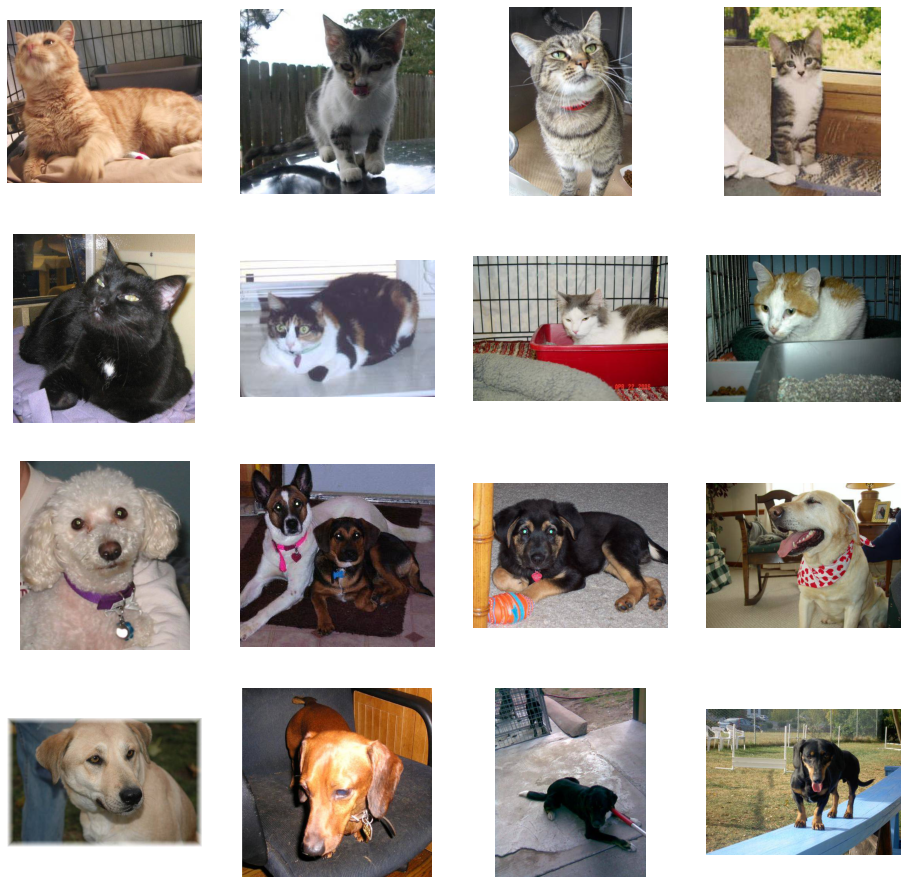

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load data and reshape each image to 150 * 150
datagen = ImageDataGenerator()
train_iter = datagen.flow_from_directory('tmp/cats_and_dogs_filtered/train/', target_size=(150, 150), class_mode='binary', batch_size=32)
test_iter = datagen.flow_from_directory('tmp/cats_and_dogs_filtered/validation/', target_size=(150, 150), class_mode='binary', batch_size=32)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### CNN architecture

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2166848   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

### Training

In [12]:
# Loss and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(train_iter, epochs=10, validation_data=test_iter)

Epoch 1/10
63/63 [==============================] - 9s 145ms/step - loss: 32.7369 - accuracy: 0.4865 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 9s 142ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 9s 141ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 9s 141ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 9s 140ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 9s 141ms/step - loss: 0.6934 - accuracy: 0.5340 - val_loss: 0.6870 - val_accuracy: 0.5700
Epoch 7/10
63/63 [==============================] - 9s 140ms/step - loss: 0.6459 - accuracy: 0.6585 - val_loss: 0.7258 - val_accuracy: 0.5920
Epoch


### **Your task:** play with the network architecture and try to achieve higher accuracy!

**Exercise 1: Add more convolutional layers**

In [1]:
## To-do

**Exercise 2: Add batch normalization**

In [2]:
## To-do

**Exercise 3: Do data augmentation**

In [3]:
## To-do

**Exercise 4: Add dropout** 

In [4]:
## To-do

**Exercise 5: Do anything you want to get a higher validation accuracy (somewhere around 80% would be nice)**

In [ ]:
## To-do

**Bonus: Load ResNet and use the pretrained weights on ImageNet to do classification and see if you can get a better result**

In [ ]:
## To-do